In [9]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [10]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [11]:
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
    ]
    
docs=[WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nThese docs will be deprecated and removed with the release of LangGraph v1.0 in October 2025. Visit the v1.0 alpha docs\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          

In [12]:
docs_list = [item for sublist in docs for item in sublist]
    
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)
doc_splits = text_splitter.split_documents(docs_list)
    ## Add all these text to vectordb
vectorstore=FAISS.from_documents(
        documents=doc_splits,
        embedding=OpenAIEmbeddings()
    )
retriever=vectorstore.as_retriever()

In [13]:
retriever.invoke("what is langgraph")

[Document(id='e7209ee7-3332-42d8-8dac-b9b7ef72f164', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangSmith Trace\nhttps://smith.langchain.com/public/abab6a44-29f6-4b97-8164-af77413e494d/r\nWhat LangGraph provides¶\nBy constructing each of the above in LangGraph, we get a few things:\nPersistence: Human-in-the-Loop¶\nLangGraph persistence layer supports interruption and approval of actions (e.g., Human In The Loop). See Module 3 of LangChain Academy.\nPersistence: Memory¶\nLangGraph persistence layer supports conversational (short-term) memory and long-term memory. See Modules 2 and 5 of LangChain Academy:\nStreaming¶\nLangGraph provides several ways to stream workflow / agent outputs or intermediate state. See Module 3 of LangChain Academy.\nDeployment¶\nLangGraph provides an easy on-ramp for deployment

In [14]:
### Retriever To Retriever Tools
from langchain.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about Langgraph")

In [15]:
retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000001772E4A07C0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001772CAEA270>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000001772E4A0900>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001772CAEA270>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), 

In [16]:
### Langchain Blogs- Seperate Vector Store

langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
    ]
docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentThese docs will be deprecated and no longer maintained with the release of LangChain v1.0 in October 2025. Visit the v1.0 alpha docsIntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engine

In [17]:
docs_list = [item for sublist in docs for item in sublist]
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)
doc_splits = text_splitter.split_documents(docs_list)
## Add alll these text to vectordb
vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
    )
retrieverlangchain=vectorstorelangchain.as_retriever()

In [18]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool_langchain=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
    )

In [19]:
tools=[retriever_tool,retriever_tool_langchain]

In [20]:
### LangGraph Workflow

from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed\n",
    # Default is to replace. add_messages says \"append\"\n",
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [21]:
from langchain.chat_models import init_chat_model
llm=init_chat_model("openai:gpt-4o")
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001772E83EFD0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001772E83F250>, root_client=<openai.OpenAI object at 0x000001772E6F7360>, root_async_client=<openai.AsyncOpenAI object at 0x000001772E6F76F0>, model_name='gpt-4o', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [22]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.
    Args:
           state (messages): The current state
    Returns:
        dict: The updated state with the agent response appended to messages\n",
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = init_chat_model("openai:gpt-4o")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list"
    return {"messages": [response]}

In [23]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict
from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field

In [24]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
         str: A decision for whether the documents are relevant or not
    """
    print("---CHECK RELEVANCE---")
    # Data model
    class grade(BaseModel):
        """Binary score for relevance check"""
        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = init_chat_model("openai:gpt-4o")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question.
Here is the retrieved document: {context}
Here is the user question: {question}
If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant.
Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool
    messages = state["messages"]
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content
    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score
    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
         str: A decision for whether the documents are relevant or not
    """
    print("---CHECK RELEVANCE---")
    # Data model
    class grade(BaseModel):
        """Binary score for relevance check"""
        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = init_chat_model("openai:gpt-4o")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question.
Here is the retrieved document: {context}
Here is the user question: {question}
If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant.
Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool
    messages = state["messages"]
    last_message = messages[-1]
    question = messages[0].content
    docs = last_message.content
    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score
    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [25]:
def generate(state):
    """ Generate answer
    Args:
        state (messages): The current state
    Returns:
        dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]
    docs = last_message.content
    prompt = hub.pull("rlm/rag-prompt")
    # Use the llm variable already defined in the notebook
    rag_chain = prompt | llm | StrOutputParser()
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [26]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f"""Look at the input and try to reason about the underlying semantic intent / meaning.
Here is the initial question:
{question}
Formulate an improved question:"""
        )
    ]
    # Grader\n",
    model = init_chat_model("openai:gpt-4o")
    response = model.invoke(msg)
    return {"messages": [response]}

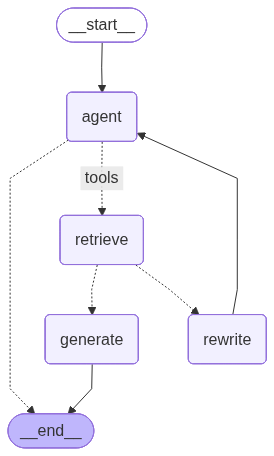

In [27]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool, retriever_tool_langchain])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node("generate", generate)  # Generating a response after we know the documents are relevant

# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")
# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)
# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
    {
        "generate": "generate",
        "rewrite": "rewrite"
    }
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")
# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [28]:
graph.invoke({"messages":"What is Langgraph?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='09af38f9-dcb1-42b1-b77d-4a282f62a023'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_oFF6LnqzkiyF3lBQkwY06Sgm', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 97, 'total_tokens': 116, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CMY5kb80Sc24HdswVBBwoBvcrYUDD', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--df3cfcd9-5657-43b0-9b29-7229c2d32a03-0', tool_calls=[{'name': 'retriever_vector_db_blog', 'args': {'query': 'Lang

In [29]:
graph.invoke({"messages":"What is Langchain?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='f8b78a09-4900-4a75-a89e-18533b8c847e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6dr1SJcN0Qc6t4EehdXCbNgj', 'function': {'arguments': '{"query":"Langchain"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 97, 'total_tokens': 117, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-CMY6AfSOetjjROmTKZMU1GYenun7T', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--00834bea-ad63-48d7-a157-55ab4437c923-0', tool_calls=[{'name': 'retriever_vector_langchain_blog', 'args': {

In [30]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='84f0c607-f51a-41b7-85da-6681571a5502'),
  AIMessage(content="Machine learning is a subset of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computers to perform tasks without being explicitly programmed to do so. Instead of following hard-coded instructions, machine learning systems improve their performance based on experience and data. Here are key points about machine learning:\n\n1. **Data-Driven**: Machine learning algorithms learn from data. They identify patterns, adapt to new inputs, and make decisions based on the data provided.\n\n2. **Types of Machine Learning**:\n   - **Supervised Learning**: Algorithms are trained on labeled data. The system learns to map inputs to the correct output, and it's used when the output is known (e.g., regression, classification).\n   - **Unsupervised Learning**: The system